# Das Perzeptron und seine Geometrie

Das Perzeptron ebsietzt eine sehr einfache Struktur, und die Hebbsche Lernregel könnte kaum einfacher sein. Wir wollen untersuchen, was eigentlich genau geschieht: Wie "unterscheidet" das Perzeptron zwischen verschiedenen Eingabe-Signalen, und wie funktioniert die Lernregel?

## Verallgemeinerung des Perzeptrons

Wir haben der Einfachheit halber ein Perzeptron mit zwei Eingängen und einem Ausgang betrachtet; eine einfachere Struktur ist nicht denkbar. Zur Untersuchung der Arbeitsweise und zur Verbesserung der Funktionalität werden wir nun nach und nach diese eine komplexere Struktur entwickeln:

* beliebige viele Eingangssignale
* beliebig viele Ausgangssignale
* andere Funktionen am Ausgangssignal (statt der einfachen _Sprungfunktion_)
* interne Schichten mit Eingangs- und Ausgangssignalen

### Implementierung des Perzeptrons

In der folgenden implementierung lassen wir beliebig viele Eingabesignale zu. Die notwendige Multiplikation der gewichte mit den Eingabesignalen und die anschließende Summenbildung würde man normalerweise durch entsprechende for-Schleifen realisieren. Einfacher geht das jedoch mit dem Python-Paket __numpy__, das genau für solche Aufgaben entwickelt wurde.

Wir implementieren das Perzeptron wieder als Python-Klasse und verwenden die Bezeichnungen, die wir von scikit-learn kennen. 

In [1]:
import numpy as np

In [2]:
class Perzeptron():
    def __init__(self,n):
        self.w = np.zeros(n)
        self.b = 0.
    
    def predict(self,x):
        return 1 if self.forward(x) > 0 else 0
    
    def fit(self,x_train,y_train,iter=100):
        for _ in range(iter):
            for x,y in zip(x_train, y_train):
                self.hebb(x,y)

    def forward(self, x):
        return np.sum(self.w * x) + self.b        
        
    def hebb(self,x,y):
        o = self.predict(x)  
        self.w += (y - o) * x
        self.b += (y - o)

    def score(self, x, y):
        return np.sum([self.predict(x) == y]) / len(x)

    def __str__(self):
        return f'Gewichte: {self.w}, Bias: {self.b}'

Zuerst wenden wir unsere neue Implementierung wieder auf das Beispiel des logischen AND an. Dazu müssen wir unsere Trainingsdaten als Numpy-Arrays deklarieren:

In [3]:
X_train = np.array([[0,0],[0,1],[1,0],[1,1]],dtype=float)
y_train = np.array([0,0,0,1],dtype=float)

p = Perzeptron(2)
p.fit(X_train,y_train)

print(p.score(X_train,y_train))
for x in X_train:
    print(f'{x} -> {p.predict(x)}')

0.25
[0. 0.] -> 0
[0. 1.] -> 0
[1. 0.] -> 0
[1. 1.] -> 1


Wir erhalten dasselbe Ergebnis. 

## Grafische Interpretation

Wir wollen nun einen anderen Blick auf das Perzeptron werfen. Bisher haben wir es als _Verarbeiter von gewichteten Eingangssignalen_ betrachtet, ausgehend vom biologischen Modell des Neurons.

Legen wir an unser trainiertes Perzeptron andere als nur trainierten Signale an. Die gewichtete Summe nimmt dann verschiedene Werte an, die wir auch grafisch darstellen können. Dazu tragen wir die Werte für die Eingangswerte $x_1$ und $x_2$ als Koordinaten in einem zweidimensionalen Raster auf und zeichnen die Werte für das Skalarproduktals farbige Punkte auf ("Heatmap"). Dazu verwenden wir das Python-Paket __matplotlib__. Als Farbpalette wählen wir die _colormap_ coolwarm; hier stehen blaue Farbwerte für niedrige und rote für hohe Zahlenwerte.

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_prediction(p):
    plt.figure(figsize=(5,5))
    plt.gca().set_aspect('equal')
    x1_start = x2_start = -0.25
    x1_end = x2_end = 1.25
    density = 0.01    
    X = np.array([[x1,x2] for x1 in np.arange(x1_start,x1_end,density) for x2 in np.arange(x2_start,x2_end,density)])
    sizes = [5 for _ in range(len(X))]
    colors = [p.forward(x) * 255 for x in X]
    plt.scatter(X[:,0],X[:,1], sizes, marker='.', cmap = cm.coolwarm, c = colors);
 

Gewichte: [1. 1.], Bias: 0.0


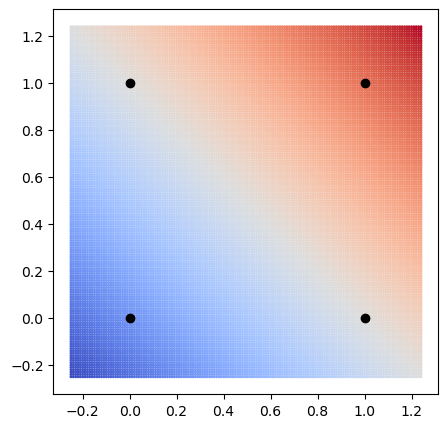

In [8]:
p = Perzeptron(2)
y_train = np.array([0,1,1,1],dtype=float)
p.fit(X_train,y_train)
print(p)

plot_prediction(p)
plt.scatter(X_train[:,0],X_train[:,1], c = 'black');

Wir erkennen einen diagonalen Farbverlauf, wobei die Werte nach rechts oben ansteigen. Dort liegt der Punkt (1,1). Ein Blick auf die Werte der Gewichte zeigt uns, dass der Farbverlauf in die Richtung des Vektors zeigt, der durch die beiden Gewichte bestimmt ist.

### Die Bedeutung der Gewichte und des Bias

Die folgenden Abbildungen zeigen das Perzeptron für verschiedene Trainingsdaten. Wir zeichnen zusätzlich die Linie ein, die dem Schwellenwert entspricht, sowie den Gewichtsvektor:

In [10]:
def plot_separator(x1_start,x1_end,w,b):
    try:
        line =  [  [x1_start,x1_end  ], [- (b + w[0] * x1_start) / w[1],- (b + w[0] * x1_end)   / w[1] ]]
        plt.plot(line[0],line[1],c='black')    
    except Exception:
        pass;

def plot_weights(w):
    w_scaled = 0.2 * w / np.linalg.norm(w)
    plt.arrow(0.5,0.5,w_scaled[0],w_scaled[1], head_width=0.05, head_length=0.05, fc='black', ec='black') 

def plot_dots(p,X):

    dots = [255 * p.predict(x) for x in X] 
    plt.scatter(X[:,0],X[:,1],cmap=cm.coolwarm, c = dots);     
    
def plot_perceptron(Y):
    X = np.array([[0,0],[0,1],[1,0],[1,1]],dtype=float)
    plt.figure(figsize=(15,10))
    x1_start = x2_start = -0.25
    x1_end = x2_end = 1.25
    density = 0.03    
    input = np.array([[x1,x2] for x1 in np.arange(x1_start,x1_end,density) for x2 in np.arange(x2_start,x2_end,density)])
    
    for n,y in enumerate(Y):
        p = Perzeptron(2)
        p.fit(X,y)        
   
        ax = plt.subplot(2,3,n+1)
        ax.axis([x1_start,x1_end,x1_start,x1_end])
        plt.title(f'y= {y}, w,b = {p.w}, {p.b}')
        
        colors = [p.forward(x) * 255 for x in input]        
        plt.scatter(input[:,0],input[:,1],cmap=cm.coolwarm,c=colors); 

        plot_dots(p,X)        
        plot_separator(x1_start,x1_end,p.w,p.b)
        plot_weights(p.w)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20240\1124748855.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  line =  [  [x1_start,x1_end  ], [- (b + w[0] * x1_start) / w[1],- (b + w[0] * x1_end)   / w[1] ]]


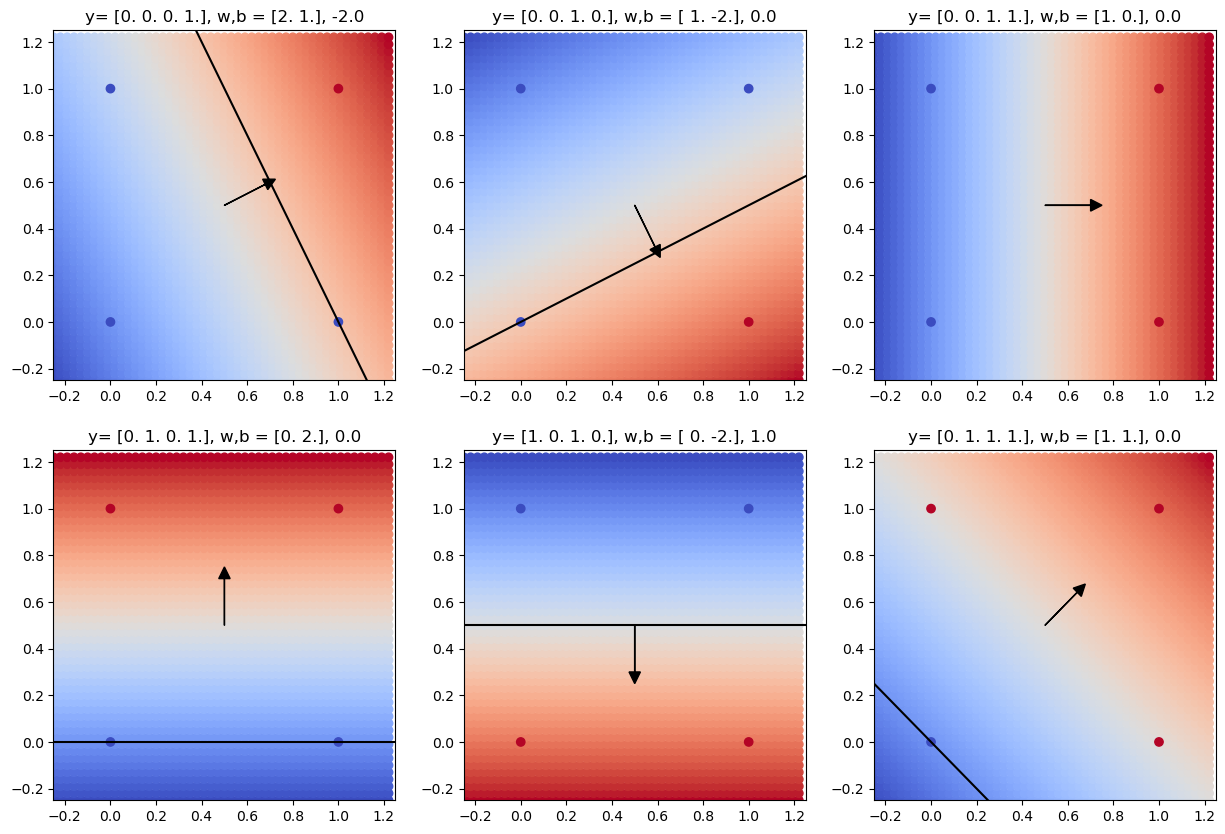

In [11]:
ys = np.array([ [0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,1],[1,0,1,0],[0,1,1,1] ],dtype = float)
#ys = np.array( [[0,0,0,1]],dtype=float)
plot_perceptron(ys)   ;     

Die Abbildungen verdeutlichen die Wirkungsweise eines (trainierten) Perzeptron:

* Das Perzeptron teilt den zweidimensionalen Raum der Eingabedaten durch eine Linie in zwei Hälften
* Die Orientierung der trennenden Linie ist durch die Gewichte bestimmt; der Gewichtsvektor steht senkrecht auf der Linie
* Die Lage der trennenden Linie ist durch den Bias bestimmt. Ist der Bias gleich 0, so geht die Linie durch den Nullpunkt; ansonsten ist sie um den Wert des Bias verschoben

Im Fall des Perzeptrons mit $N$ Eingängen wird dies verallgemeinert zu:

__Das Perzeptron mit $N$ Eingängen zerlegt den $N$-dimensionalen Raum der Eingabedaten durch eine $N-1$-dimensionale (Hyper-)Ebene in zwei Bereiche. Die Lage und die Orientierung dieser Ebene ist durch die $N$ Gewichte und den Bias definiert.__

# Zusammenfassung

* Wir haben das Perzeptron auf beliebige Eingabewerte angewandt. Durch die grafische Darstellung haben wir erkannt, dass das Perzeptron Eingabedaten dadurch klassifiziert, indem es den N-dimensionalen Raum  der möglichen Eingabewerte in zwei Halbräume unterteilt, die den beiden Klassen entsprechen. Kompliziertere Unterteilungen sind nicht möglich, wodurch das XOR-Problem erklärt werden kann.

* Es gibt einen starken geometrischen Aspekt hinter der Arbeitsweise des Perzeptrons  (und, wie wir sehen werden, auch bei allgemeineren künstlichen neuronalen Netzen). Daher sind grundlegende Kenntnisse in diesem Bereich der Mathematik enorm hilfreich, um ein tieferes Verständnis für neuronale Netze zu entwickeln. Der Bereich der Mathematik, der sich mit dieser Art der geometrie beschäftigt, wird __Lineare Algebra__ genannt.

* Wir haben noch nicht genau verstanden, wie die Lernregel funktioniert. Dies werden wir aber im allgemeren Fall der Neuronalen Netze genauer untersuchen und dann auf das Perzeptron zurückkommen.